In [2]:
import pickle

import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
# " LOAD DATA BASE"
dataset = 'ResponseChatBot.xlsx'
knowledge_base = pd.read_excel(dataset)
knowledge_base.sample(n=20).head(20)

,request,response
14,¿cómo estás?,bien y tu
15,¿cuentame tu día ?,estuvo bien y el tuyo
23,¿Cómo funciona?,Solo debes decirme que necesitas
10,adios,adiós
13,cómo estas,bien y tu
2,buenas,buenas
4,buenas noches,buenas noches
16,cómo estás?,bien y tu
8,hey,hola
1,hi,hola


In [6]:
knowledge_base["response"].unique()

array(['hola', 'buenas', 'buenas  tardes', 'buenas noches', 'Buenos dias',
       'adiós ', 'ten buen día', 'bien y tu', 'estuvo bien y el tuyo ',
       'bye', 'Hola soy bot tu asistente virtual', 'Te leo',
       'Hola soy bot ', 'Solo debes decirme que necesitas'], dtype=object)

In [7]:
len(knowledge_base)

24

In [8]:
# label encode the target variable to transform non-numerical labels
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(knowledge_base["response"])  # numerical labels
y

array([12, 12,  7,  8,  9,  0, 12, 12, 12, 12,  5,  5, 13,  6,  6, 11,  6,
        6, 10,  2,  4,  1,  6,  3])

In [9]:
intent_names = encoder.classes_
intent_names

array(['Buenos dias', 'Hola soy bot ',
       'Hola soy bot tu asistente virtual',
       'Solo debes decirme que necesitas', 'Te leo', 'adiós ',
       'bien y tu', 'buenas', 'buenas  tardes', 'buenas noches', 'bye',
       'estuvo bien y el tuyo ', 'hola', 'ten buen día'], dtype=object)

In [10]:
x = knowledge_base["request"]
x

0                   hola
1                     hi
2                 buenas
3          buenas tardes
4          buenas noches
5            buenos dias
6                    ola
7                  hello
8                    hey
9                     ey
10                adios 
11                 chao 
12          hasta luego 
13            cómo estas
14          ¿cómo estás?
15    ¿cuentame tu día ?
16           cómo estás?
17            como estas
18                   bye
19          ¿Quién eres?
20           ¿Qué haces?
21     ¿Cómo te llamas? 
22         ¿Cómo estás? 
23      ¿Cómo funciona? 
Name: request, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
# Hold-out Partition
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

# PROCESAMIENTO

## ....

In [12]:
" TF-IDF score represents the relative importance of a term in the document and the entire corpus. "
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
x_train_tfidf = tfidf_vect.transform(X_train)
x_train_tfidf

<18x25 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [13]:
tfidf_vect.get_feature_names_out()

array(['buenas', 'buenos', 'bye', 'como', 'cuentame', 'cómo', 'dias',
       'día', 'eres', 'estas', 'estás', 'ey', 'funciona', 'hasta',
       'hello', 'hey', 'hola', 'llamas', 'luego', 'noches', 'ola',
       'quién', 'tardes', 'te', 'tu'], dtype=object)

In [29]:
" MODEL TRAINING AND DEVELOPMENT"
nfolds = 5
tuned_parameters = {'C': [0.001, 0.10, 0.1, 10, 100, 1000]}
lr_model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=nfolds,  scoring='accuracy') 
lr_model.fit(x_train_tfidf, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 100, 1000]},
             scoring='accuracy')

In [30]:
means = lr_model.cv_results_['mean_test_score']
stds = lr_model.cv_results_['std_test_score']
parameters = lr_model.cv_results_['params']
results = pd.concat((pd.DataFrame.from_dict(parameters), pd.DataFrame(means, columns=['Mean']), pd.DataFrame(stds, columns=['STD'])), axis=1)
results

,C,Mean,STD
0,0.001,0.283333,0.040825
1,0.100,0.283333,0.040825
2,0.100,0.283333,0.040825
3,10.000,0.383333,0.100000
4,100.000,0.383333,0.100000
5,1000.000,0.383333,0.100000


In [31]:
best_c = lr_model.cv_results_['params'][lr_model.best_index_]['C']
best_c

10

In [32]:
# TEST & METRICS & ERROR ANALYSIS

best_lr_model = LogisticRegression(C=best_c).fit(x_train_tfidf, y_train)

In [33]:
X_test.head()

11            chao 
10           adios 
22    ¿Cómo estás? 
14     ¿cómo estás?
20      ¿Qué haces?
Name: request, dtype: object

In [ ]:
# PROCESAMIENTO DEL CONJUNTO DE TEST

In [34]:
x_test_tfidf = tfidf_vect.transform(X_test)
x_test_tfidf

<6x25 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [35]:
y_pred = best_lr_model.predict(x_test_tfidf)

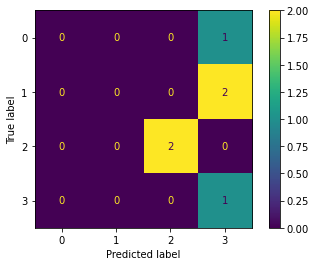

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
          12       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.31      0.50      0.35         6
weighted avg       0.38      0.50      0.40         6



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# TRAIN MODEL WITH ALL DATA FOR PRODUCTION
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x)
x_tfidf = tfidf_vect.transform(x)

pdn_lr_model = LogisticRegression(C=best_c).fit(x_tfidf, y)

In [39]:
pdn_lr_model

LogisticRegression(C=10)

In [67]:
# "SAVE FINAL MODEL"
pickle.dump(pdn_lr_model, open('model_chatbot.pkl', 'wb'))
pickle.dump(tfidf_vect, open('chatbot_vocabulary.pkl', 'wb'))
pickle.dump(intent_names, open('response_chatbot.pkl', 'wb'))